# Load Data & Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kazanova/sentiment140")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sentiment140


In [ ]:
df = pd.read_csv(path + "/training.1600000.processed.noemoticon.csv", encoding="latin-1", names=['sentiment', 'id', 'date', 'flag', 'user', 'text'])
df

,sentiment,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
0,800000
4,800000


In [ ]:
df = df[['text', 'sentiment']]  # Keep only text and label
df['sentiment'] = df['sentiment'].map({4: 'Positive', 0: 'Negative'})
df

<ipython-input-24-3a7fbc063e07>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['sentiment'].map({4: 'Positive', 0: 'Negative'})


,text,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",Negative
1,is upset that he can't update his Facebook by ...,Negative
2,@Kenichan I dived many times for the ball. Man...,Negative
3,my whole body feels itchy and like its on fire,Negative
4,"@nationwideclass no, it's not behaving at all....",Negative
...,...,...
1599995,Just woke up. Having no school is the best fee...,Positive
1599996,TheWDB.com - Very cool to hear old Walt interv...,Positive
1599997,Are you ready for your MoJo Makeover? Ask me f...,Positive
1599998,Happy 38th Birthday to my boo of alll time!!! ...,Positive


# EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   text       1600000 non-null  object
 1   sentiment  1600000 non-null  object
dtypes: object(2)
memory usage: 24.4+ MB


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
Negative,800000
Positive,800000


In [ ]:
print(df['sentiment'].isnull().sum())
print(df['text'].isnull().sum())

0
0


# Load NLP Libraries

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk import word_tokenize, MWETokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import string
!pip install contractions
from contractions import fix

# Data Preprocessing

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra spaces


    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove mentions (@user) and hashtags (#tag)
    text = re.sub(r'@\w+|#\w+', '', text)

     # Remove emojis (Unicode ranges)
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "]+", flags=re.UNICODE
    )
    text = emoji_pattern.sub(r'', text)

    text = fix(text)

    return text

df['text'] = df['text'].apply(clean_text)
df

<ipython-input-30-671e8da11c16>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(clean_text)


,text,sentiment
0,switchfoot awww that is a bummer you shoulda ...,Negative
1,is upset that he cannot update his facebook by...,Negative
2,kenichan i dived many times for the ball manag...,Negative
3,my whole body feels itchy and like its on fire,Negative
4,nationwideclass no its not behaving at all i a...,Negative
...,...,...
1599995,just woke up having no school is the best feel...,Positive
1599996,thewdbcom very cool to hear old walt interview...,Positive
1599997,are you ready for your mojo makeover ask me fo...,Positive
1599998,happy th birthday to my boo of alll time tupac...,Positive


In [ ]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['sentiment']

# 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Word2vec

In [ ]:
!pip uninstall gensim -y
!pip install gensim
import os
os.kill(os.getpid(), 9)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 16.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Tokenize sentences
train_sentences = [word_tokenize(sent) for sent in X_train]

# Skip-gram model (better for rare words)
model = Word2Vec(
    sentences=train_sentences,
    vector_size=100,  # Embedding dimension
    window=5,        # Context window
    min_count=5,     # Ignore rare words
    sg=1,            # 1=Skip-gram, 0=CBOW
    workers=4        # Parallel threads
)

# Save model
model.save("twitter_word2vec.model")

# Example: Find similar words
print(model.wv.most_similar("happy", topn=5))

[('happpy', 0.7447754740715027), ('xsavedgex', 0.7122299075126648), ('dayhappy', 0.7021508812904358), ('mothersday', 0.6983212828636169), ('happppy', 0.689376711845398)]


# Tf-Idf + Logistic Regression

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score

# TF-IDF with n-grams
tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train Logistic Regression
lr = LogisticRegression(max_iter=1000, C=1.0)
lr.fit(X_train_tfidf, y_train)

# Evaluate
print(f"Accuracy: {accuracy_score(y_test, lr.predict(X_test_tfidf))}")
print(classification_report(y_test, lr.predict(X_test_tfidf)))

Accuracy: 0.811825
              precision    recall  f1-score   support

    Negative       0.82      0.80      0.81    159494
    Positive       0.80      0.82      0.81    160506

    accuracy                           0.81    320000
   macro avg       0.81      0.81      0.81    320000
weighted avg       0.81      0.81      0.81    320000



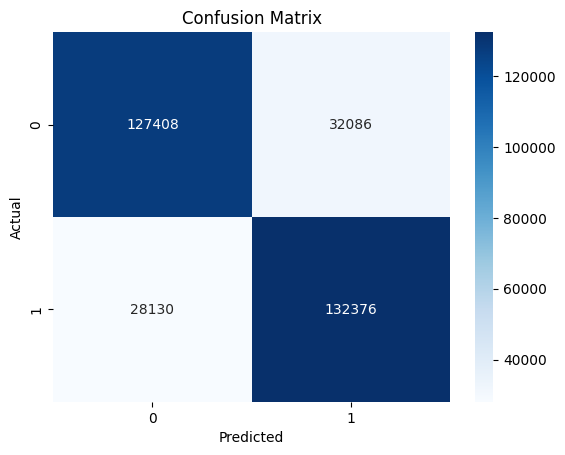

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test_tfidf)), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
!pip install joblib
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import pickle

from sklearn.pipeline import Pipeline

# 1. Create the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=20000, ngram_range=(1, 2))),
    ('classifier', LogisticRegression(max_iter=1000, C=1.0))
])

# 2. Fit the pipeline (replace with your actual training data)
pipeline.fit(X_train, y_train)

# 3. Save the entire pipeline
joblib.dump(pipeline, 'sentiment_pipeline.joblib')

['sentiment_pipeline.joblib']

In [ ]:
# Load and test
loaded_pipeline = joblib.load('sentiment_pipeline.joblib')

# Example prediction
sample_text = ["This movie was good"]

prediction = loaded_pipeline.predict(sample_text)  #
print(prediction)

['Positive']


In [ ]:
trials = pd.read_csv("ouyput.csv")
trials

,0
0,The shoes arrived early(Oct 20th) The fit is f...
1,Great seller. Excellent communication and so e...
2,"Great boots, super fast shipping and well pack..."
3,As described! Fast delivery!
4,Product was as ordered; delivery on time and t...
5,"This seller , londonvgventures , is very respo..."
6,Item arrived promptly and well packaged. Selle...
7,"Item just as described, arrived well packed."
8,The shoes arrived early(Oct 20th) The fit is f...
9,Great seller. Excellent communication and so e...


In [ ]:
for index, row in trials.iterrows():
    text = row['0']
    prediction = loaded_pipeline.predict([text])
    print(prediction)

['Positive']
['Positive']
['Positive']
['Positive']
['Positive']
['Positive']
['Positive']
['Positive']
['Positive']
['Positive']
['Positive']
['Positive']
['Positive']
['Positive']
['Positive']
['Positive']
